## 라이브러리 불러오기

<Axes: >

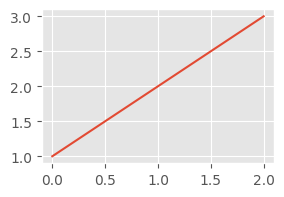

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))
 

In [2]:
!pip install scikit-learn
 

## 데이터 불러오기

In [3]:
#df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('data/advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## 데이터 이해

### 매체별 광고비에 따른 판매량

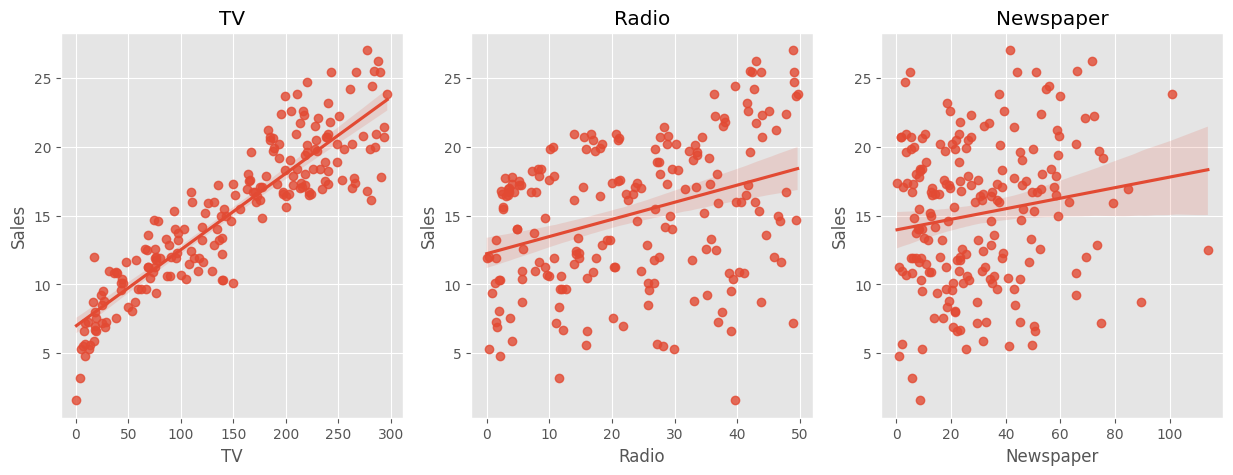

In [6]:
#시각화

plt.figure(figsize = (15,5))
# TV 광고비에 따른 판매량
plt.subplot(1,3,1)
sns.regplot(data = df, x='TV', y='Sales')
plt.title('TV')
#plt.show()

# Radio 광고비에 따른 판매량
plt.subplot(1,3,2)
sns.regplot(data = df, x='Radio', y='Sales')
plt.title('Radio')
#plt.show()

# Newspaper 광고비에 따른 판매량
plt.subplot(1,3,3)
sns.regplot(data = df, x='Newspaper', y='Sales')
plt.title('Newspaper')
#plt.show()
pass

## 상관계수

<Axes: >

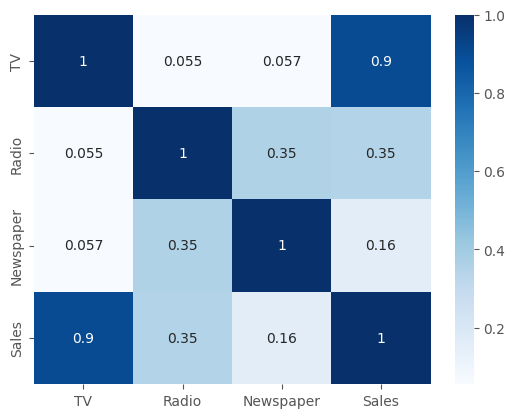

In [7]:
#상관계수 히트맵 시각화

sns.heatmap(df.corr(),cmap='Blues',annot=True)

## 독립변수, 종속변수 선택

In [8]:
X = df[['TV']]
y = df['Sales']


## Train, Test split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(150, 1) (50, 1) (150,) (50,)


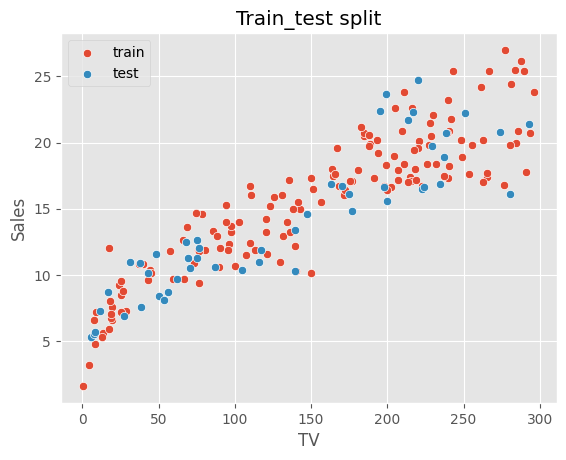

In [10]:
sns.scatterplot(x = X_train['TV'], y = y_train, label = 'train')
sns.scatterplot(x = X_test['TV'], y = y_test, label = 'test')
plt.legend()
plt.title('Train_test split')
plt.xlabel('TV')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Test를 통한 평가

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

pred = model.predict(X_test)

mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = root_mean_squared_error(y_test,pred)
r2score = r2_score(y_test,pred)

print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE : {rmse}')
print(f'R2-score : {r2score}')

print(f'''
      mse : {mse:.2f}
      rmse : {rmse:.2f}
      mae : {mae:.2f}
      r2 : {r2score:.2f}
            ''')

MSE : 5.513351187165511
MAE : 1.8651146911099161
RMSE : 2.3480526372220685
R2-score : 0.7971876919875108

      mse : 5.51
      rmse : 2.35
      mae : 1.87
      r2 : 0.80
            


## 수동으로 MAE 구하기

In [13]:
df_pred = pd.DataFrame({'X_test':X_test['TV'],
    'y_test':y_test,
    'y_pred':pred})
df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)


,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [14]:
mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)
#r2 score
rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum() 
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum() 
r2 = 1 - (rss/tss)


print(f'''
mse : {mse:.2f}
rmse : {rmse:.2f}
mae : {mae:.2f}
r2 : {r2:.2f}
      ''')



mse : 5.51
rmse : 2.35
mae : 1.87
r2 : 0.80
      


## 모델의 학습 결과

In [15]:
# 회귀계수
print('회귀계수:', model.coef_)
w = model.coef_
# 절편
print('절편:', model.intercept_)
b = model.intercept_
# 회귀식
print(f'회귀식: {w[0]} * TV + {b} ')

회귀계수: [0.05538653]
절편: 7.098853680118275
회귀식: 0.05538653085519158 * TV + 7.098853680118275 


<Axes: xlabel='TV', ylabel='Sales'>

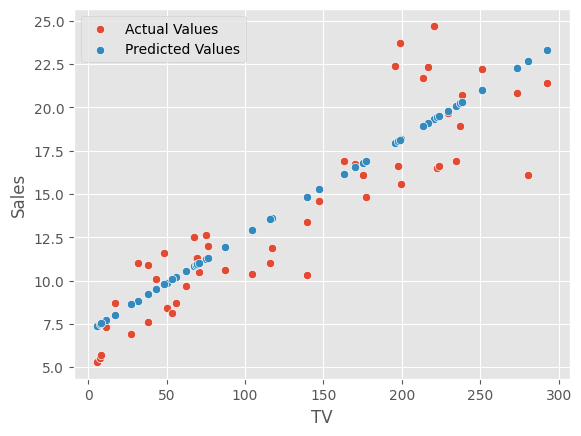

In [16]:
#테스트데이터 실제값과 예측값 확인(독립변수 - 종속변수 관계 시각화)
sns.scatterplot(x = X_test['TV'],y = y_test, label = 'Actual Values')
sns.scatterplot(x = X_test['TV'],y = pred, label = 'Predicted Values')